In [45]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing import image 
from keras.applications import vgg16
from keras.layers import Dense, Dropout, Flatten
from keras import callbacks 
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [46]:
batch_size =  20
IMG_ROW, IMG_COL = 64, 64

In [47]:
import glob
import random 

images = []
labels = []

images_p = random.sample(glob.glob('cell_images/Parasitized/*.png'), 250)

for i in images_p:
    img = image.load_img(i, target_size = (IMG_ROW, IMG_COL))
    image_array = image.img_to_array(img)
    images.append (image_array)
    labels.append(1)
    
images_u = random.sample(glob.glob('cell_images/Uninfected/*.png'), 250)

for i in images_u:
    img = image.load_img(i, target_size = (IMG_ROW, IMG_COL))
    image_array = image.img_to_array(img)
    images.append (image_array)
    labels.append(0)

In [22]:
len (images)

500

In [23]:
images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [24]:
labels[0]

1

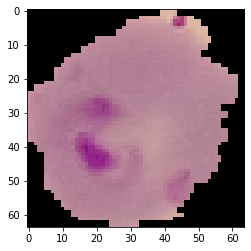

In [25]:
plt.imshow(images[0]/255.)

In [48]:
# Shuffle and split train/test set 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffles
images, labels = shuffle(images, labels)

# train-test-split
X = np.array (images)
y = np.array (labels)

X_train, X_test, y_train, y_test = train_test_split (X,y, random_state = 42, test_size = 0.2)

In [49]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(400, 64, 64, 3)
(400,)
(100, 64, 64, 3)
(100,)


## Build  CNN models 

In [50]:
# Scale for X // no need to encode y as Binary categorical
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
model_cnn = tf.keras.models.Sequential()

# Convolution and MaxPooling
model_cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (64,64,3)))
model_cnn.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model_cnn.add(layers.MaxPooling2D(2,2))

# Flatten
model_cnn.add(layers.Dropout(0.2))
model_cnn.add(layers.Flatten())

# ANN part and compile
model_cnn.add(layers.Dense(64,activation = 'relu'))
model_cnn.add(layers.Dense(64,activation = 'relu'))
model_cnn.add(layers.Dense(1,activation = 'sigmoid'))

model_cnn.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

hist = model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=20, validation_data = (X_test,y_test))

Epoch 1/20
20/20 [==============================] - 3s 128ms/step - loss: 0.6858 - accuracy: 0.5500 - val_loss: 0.6856 - val_accuracy: 0.6000
Epoch 2/20
20/20 [==============================] - 2s 110ms/step - loss: 0.7000 - accuracy: 0.5225 - val_loss: 0.6929 - val_accuracy: 0.4800
Epoch 3/20
20/20 [==============================] - 2s 105ms/step - loss: 0.6794 - accuracy: 0.5575 - val_loss: 0.6801 - val_accuracy: 0.5100
Epoch 4/20
20/20 [==============================] - 2s 99ms/step - loss: 0.6636 - accuracy: 0.6050 - val_loss: 0.7183 - val_accuracy: 0.5900
Epoch 5/20
20/20 [==============================] - 2s 103ms/step - loss: 0.6205 - accuracy: 0.6575 - val_loss: 0.6934 - val_accuracy: 0.5900
Epoch 6/20
20/20 [==============================] - 2s 104ms/step - loss: 0.6102 - accuracy: 0.6275 - val_loss: 0.6629 - val_accuracy: 0.6100
Epoch 7/20
20/20 [==============================] - 2s 105ms/step - loss: 0.5335 - accuracy: 0.7100 - val_loss: 0.7005 - val_accuracy: 0.5500
Epoch 8

In [30]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

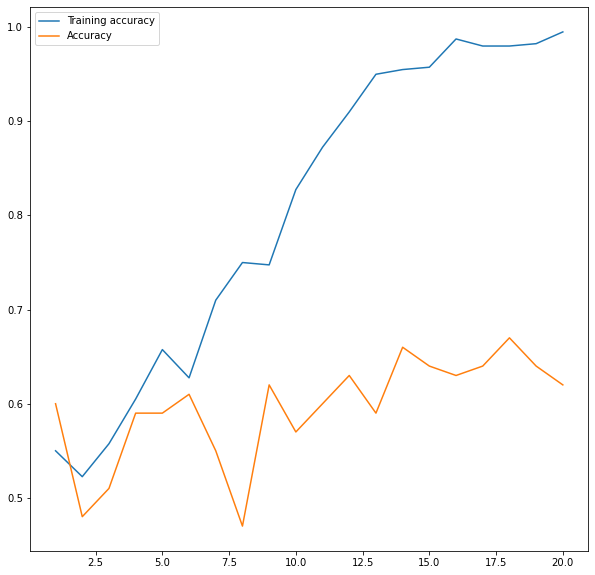

In [31]:
epochs_list = list (range (1,len(hist.history['accuracy'])+1))
plt.figure(figsize =(10,10))
plt.plot(epochs_list, hist.history['accuracy'])
plt.plot(epochs_list,hist.history['val_accuracy'])
plt.legend (['Training accuracy', 'Accuracy'])
plt.show()

### Tuning using ImageDataGenerate

In [32]:
gen = ImageDataGenerator (rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

model_cnn2 = model_cnn.fit_generator(gen.flow(X_train,y_train, batch_size=batch_size), validation_data=(X_test,y_test),steps_per_epoch=len(X_train) // 20, epochs=100,callbacks=[early_stop] )

Epoch 1/100
20/20 [==============================] - 2s 112ms/step - loss: 1.0216 - accuracy: 0.5700 - val_loss: 0.6368 - val_accuracy: 0.6900
Epoch 2/100
20/20 [==============================] - 2s 103ms/step - loss: 0.6462 - accuracy: 0.6450 - val_loss: 0.5635 - val_accuracy: 0.7400
Epoch 3/100
20/20 [==============================] - 2s 104ms/step - loss: 0.6098 - accuracy: 0.7700 - val_loss: 0.5594 - val_accuracy: 0.7100
Epoch 4/100
20/20 [==============================] - 2s 105ms/step - loss: 0.5991 - accuracy: 0.7375 - val_loss: 0.4417 - val_accuracy: 0.8600
Epoch 5/100
20/20 [==============================] - 2s 111ms/step - loss: 0.4783 - accuracy: 0.8025 - val_loss: 0.4961 - val_accuracy: 0.7700
Epoch 6/100
20/20 [==============================] - 2s 111ms/step - loss: 0.4657 - accuracy: 0.8325 - val_loss: 0.3305 - val_accuracy: 0.9200
Epoch 7/100
20/20 [==============================] - 2s 111ms/step - loss: 0.4111 - accuracy: 0.8650 - val_loss: 0.3704 - val_accuracy: 0.8600

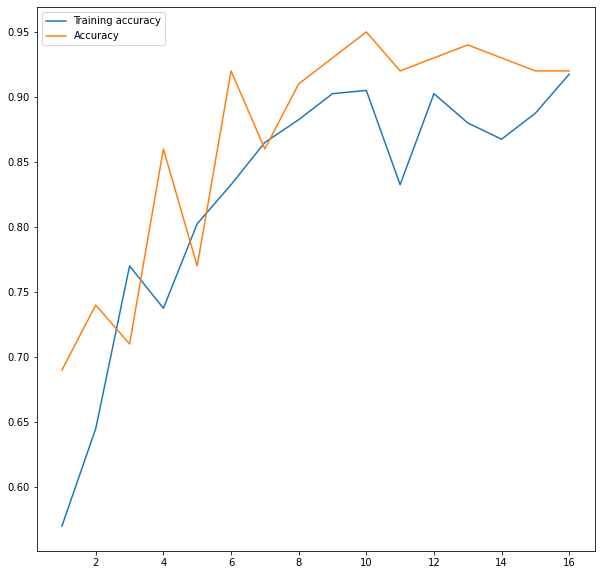

In [33]:
epochs_list = list (range (1,len(model_cnn2.history['accuracy'])+1))
plt.figure(figsize =(10,10))
plt.plot(epochs_list, model_cnn2.history['accuracy'])
plt.plot(epochs_list,model_cnn2.history['val_accuracy'])
plt.legend (['Training accuracy', 'Accuracy'])
plt.show()

## Transfer learning 

In [51]:
from keras.applications import vgg16
base_model = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape= (64,64,3))

In [52]:
# Input new classification prediction 
from keras.models import Model
x= base_model.output
x= Flatten()(x)
x= Dense (64, activation = 'relu')(x)
x= Dense (64, activation = 'relu')(x)
x= Dropout(0.2)(x)
predictions = Dense (1, activation = 'sigmoid')(x)

trans_model = Model (inputs=base_model.input, outputs=predictions)

print (trans_model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)      

In [53]:
print ('Performing Transfer Learning')

for layer in base_model.layers: 
    print(layer)
    layer.trainable = False
    
trans_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Performing Transfer Learning


In [54]:
trans_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)      

In [55]:
early_stop = callbacks.EarlyStopping(monitor= 'val_loss', patience = 3)

hist_trans1 = trans_model.fit(X_train, y_train, epochs=100,batch_size=batch_size, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/100
20/20 [==============================] - 7s 338ms/step - loss: 0.6091 - accuracy: 0.6675 - val_loss: 0.4120 - val_accuracy: 0.8600
Epoch 2/100
20/20 [==============================] - 7s 335ms/step - loss: 0.4413 - accuracy: 0.7900 - val_loss: 0.2825 - val_accuracy: 0.8900
Epoch 3/100
20/20 [==============================] - 7s 368ms/step - loss: 0.3161 - accuracy: 0.8725 - val_loss: 0.2466 - val_accuracy: 0.9100
Epoch 4/100
20/20 [==============================] - 8s 395ms/step - loss: 0.2323 - accuracy: 0.9025 - val_loss: 0.1767 - val_accuracy: 0.9200
Epoch 5/100
20/20 [==============================] - 8s 396ms/step - loss: 0.1874 - accuracy: 0.9300 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 6/100
20/20 [==============================] - 8s 400ms/step - loss: 0.1742 - accuracy: 0.9425 - val_loss: 0.1404 - val_accuracy: 0.9400
Epoch 7/100
20/20 [==============================] - 8s 417ms/step - loss: 0.1271 - accuracy: 0.9575 - val_loss: 0.1946 - val_accuracy: 0.9400

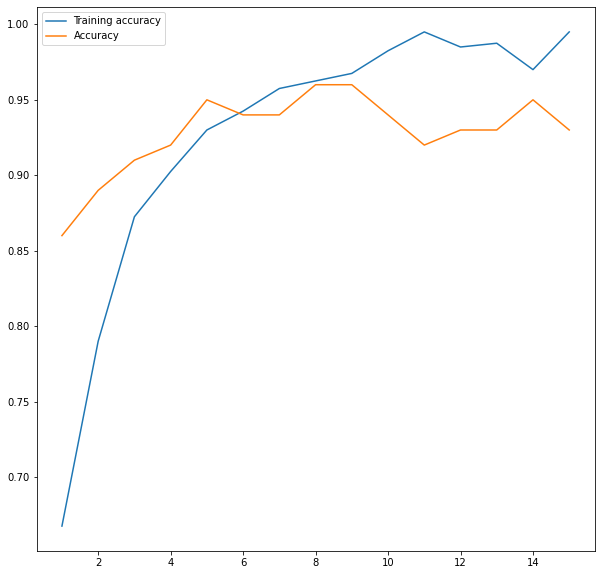

In [60]:
epoch_list = list (range (1, len(hist_trans1.history['accuracy'])+1))
plt.figure(figsize =(10,10))
plt.plot(epoch_list, hist_trans1.history['accuracy'])
plt.plot(epoch_list, hist_trans1.history['val_accuracy'])
plt.legend(['Training accuracy', 'Accuracy'])
plt.show()

#### Both Image Data Generator and Transfer learning help develop a more accurate model for prediction. 